In [674]:
import pandas as pd

from pytrends.request import TrendReq
pytrend = TrendReq()

from sklearn.decomposition import PCA
import statistics as stat
import numpy as np
import math
import time
import matplotlib.pyplot as plt
import var_treat as vt
import plotly.express as px



# ###########################################################################

# #search_index class gets the monthly search data from google trend using the google tred API
# class search_index:

#     def __init__(self, word_search, location):
#         self.word_search = word_search
#         self.location = location

#     def df_search_tiator(self):
        
#         word_search = self.word_search
#         geo_code_province = self.location

#         #Creating an empty data frame to add search data
#         df_search_main = pd.DataFrame()    
#         row_length, col_length = df_search_main.shape 

#         for geo_code_index in geo_code_province:
            
#             #If the user have list of their own word search 
#             #otherwise it uses the google search recomendation
#             if isinstance(word_search, list) == True:
#                 search_queries = word_search

#             else:
#                 #The initial word search
#                 pytrend.build_payload(kw_list=[word_search], timeframe='all', geo=geo_code_index)
#                 search_queries = pytrend.related_queries()[word_search]['top']['query'] #this gets the related serch words

#                 #the data for the initial search
#                 over_time_search = pytrend.interest_over_time()

#                 #Inserting data into dataframe
#                 df_search_main.insert(col_length, (geo_code_index +'_'+ word_search), over_time_search[word_search], True)
#                 row_length, col_length = df_search_main.shape
            

#             #Loops through the search words
#             for rel_query in search_queries:

#                 pytrend.build_payload(kw_list=[rel_query], timeframe='all', geo=geo_code_index)
#                 rel_query_over_time_search = pytrend.interest_over_time()

#                 #Inserting data into dataframe 
#                 df_search_main.insert(col_length, (geo_code_index +'_'+ rel_query), rel_query_over_time_search[rel_query], True)
#                 row_length, col_length = df_search_main.shape
#                 time.sleep(2)


#         return df_search_main, search_queries




In [675]:
# df_house_index, search_query = search_index('house for sale',['CA']).df_search_tiator()

# with pd.ExcelWriter('search_data.xlsx') as writer:  
#     df_house_index[:].to_excel(writer, sheet_name='Raw')

In [676]:
#Loading the actual house price data
filename = 'search_data.xlsx'

xls=pd.ExcelFile(filename) 
df_house_index = pd.read_excel(xls)

In [677]:
df_house_index[72:]

,date,CA_house for sale,CA_house for sale ontario,CA_houses for sale,CA_homes for sale,CA_toronto house for sale,CA_house for sale calgary,CA_house for rent,CA_real estate,CA_kijiji house for sale,...,CA_house for sale mississauga,CA_hamilton house for sale,CA_house for sale in calgary,CA_house for sale in brampton,CA_house for sale in surrey,CA_house for sale windsor,CA_for sale by owner,CA_house for sale by owner,CA_house for sale in toronto,CA_house for sale montreal
72,2010-01-01,14,16,16,32,32,9,35,68,17,...,21,8,12,5,5,8,76,68,22,8
73,2010-02-01,14,21,16,29,36,14,31,64,18,...,27,12,14,8,2,4,77,45,33,10
74,2010-03-01,16,21,18,32,39,15,38,73,26,...,22,16,14,16,2,12,82,42,49,15
75,2010-04-01,18,29,18,34,38,13,36,72,19,...,26,15,15,14,1,20,87,60,33,24
76,2010-05-01,16,21,17,32,53,11,36,67,18,...,26,8,6,11,4,18,80,43,53,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,2022-03-01,79,75,82,81,59,79,73,61,46,...,72,70,74,55,42,82,44,28,52,75
219,2022-04-01,80,73,75,82,61,69,67,60,41,...,51,70,61,62,41,73,43,31,54,76
220,2022-05-01,74,70,73,73,63,60,68,57,40,...,54,69,53,54,43,67,40,19,47,60
221,2022-06-01,72,69,72,73,62,65,67,55,40,...,61,56,66,58,45,62,38,23,51,59


In [678]:

def median_tinator(df):
    
    #Demeaning
    for values in df.columns.values:
        u = stat.mean(df[values])
        std = stat.stdev(df[values])

        df[values] = (((df[values] - u)/std) +10)

    #This on is with base year
    df = df.apply(lambda x: np.floor(((x)/x.iloc[0] * 100)))

    #calculating the median
    arr = []
    for x in df.T.columns.values:    
        arr.append(stat.median(df.T[x]))

    #Putting the array in dataframe
    df_index = pd.DataFrame({'index':arr})
    df_index = df_index.set_index(pd.Index(df.T.columns.values[:]))

    return df_index




In [679]:
df_house_index = median_tinator(df_house_index.iloc[72:,1:])


Gold Mine

In [680]:
#df_house_index_ma = df_house_index.rolling(window =20).mean() #this is working

df_house_index_ma = vt.Deseasonalize_STL(df_house_index).rolling(window =20).mean()

#df_house_index_ma = vt.ExpSmoother(vt.Deseasonalize_STL(df_house_index)).rolling(window =20).mean() 

#df_house_index_ma = df_house_index.rolling(window =20).mean() 

In [681]:

# df_house_index_ma = vt.Deseasonalize_STL(df_house_index).rolling(window =20).mean() #this is working
# df_house_index_ma['Deseason'] = vt.ExpSmoother(vt.Deseasonalize_STL(df_house_index)).rolling(window =20).mean() #this is working
# df_house_index_ma['original'] = df_house_index #this is working
# fig = px.line(df_house_index_ma, color='variable',labels=dict(index="time", value="Level", variable="option"), width=900, height=400)
# fig.show()

In [682]:
df_house_index[:]

,index
72,100.0
73,100.5
74,101.5
75,103.0
76,101.5
...,...
218,129.0
219,129.0
220,126.5
221,127.5


In [683]:
df_house_index_ma

,index
72,NaN
73,NaN
74,NaN
75,NaN
76,NaN
...,...
218,131.257009
219,131.012609
220,130.819790
221,130.664080


In [684]:
#Loading the actual house price data
#filename = 'Canada New House Price.xlsx'
filename = 'hp_2.xlsx'

xls=pd.ExcelFile(filename) 
df_hp = pd.read_excel(xls)
df_hp = df_hp.set_index(pd.Index(df_house_index.T.columns.values[:150])).iloc[:,:]

In [685]:
df_hp

,Date,Price
72,2010-01-01,100.000000
73,2010-02-01,100.000000
74,2010-03-01,100.344432
75,2010-04-01,100.574053
76,2010-05-01,100.918485
...,...,...
217,2022-02-01,141.446613
218,2022-03-01,143.168772
219,2022-04-01,143.628014
220,2022-05-01,144.316877


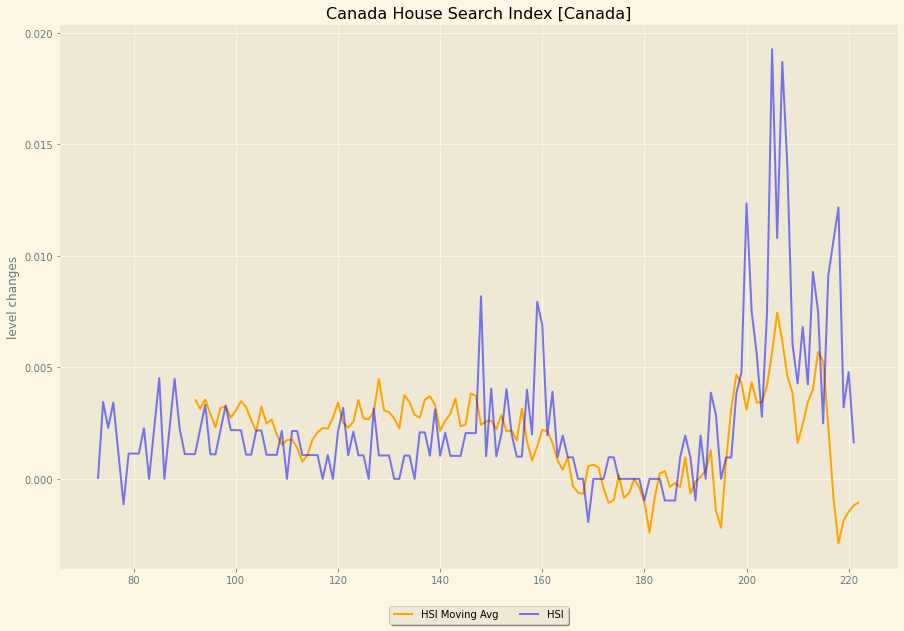

In [686]:
with plt.style.context('Solarize_Light2'):
    plt.rcParams['figure.figsize'] = [15, 10]
    
    # plt.plot(df_house_index_ma[:], color='orange')
    # plt.plot(df_house_index[:], color='purple')
    # plt.plot(df_hp.iloc[:,1:], color='blue', alpha=0.5)

    plt.plot(df_house_index_ma[:].pct_change(), color='orange')
    #plt.plot(df_house_index[:].pct_change(), color='purple')
    plt.plot(df_hp.iloc[:,1:].pct_change(), color='blue', alpha=0.5)
    
    #Labling the plot
    plt.title('Canada House Search Index [Canada]')
    plt.ylabel('level changes', fontsize=12)
    plt.legend(['HSI Moving Avg','HSI','House Price'], loc='upper center', bbox_to_anchor=(0.5, -0.06),
          fancybox=True, shadow=True, ncol=4)

plt.show()

In [687]:
test_df = df_house_index_ma.dropna()
test_df

,index
91,101.428594
92,101.790859
93,102.111238
94,102.474935
95,102.773294
...,...
218,131.257009
219,131.012609
220,130.819790
221,130.664080


In [688]:
test_hp = df_hp[19:]
test_hp

,Date,Price
91,2011-08-01,103.329506
92,2011-09-01,103.444317
93,2011-10-01,103.673938
94,2011-11-01,104.018370
95,2011-12-01,104.133180
...,...,...
217,2022-02-01,141.446613
218,2022-03-01,143.168772
219,2022-04-01,143.628014
220,2022-05-01,144.316877


In [689]:
test_hp = test_hp.set_index(pd.Index(test_df.T.columns.values[:131])).iloc[:,1:].pct_change()

In [690]:

import pandas as pd

#input for this is (dataframe, dictionary for the lagg values)
def data_process_tinator(df,var_lagg_values):
    for var in var_lagg_values:

        lagg_value = var_lagg_values[var]

        df[var] = df[var].shift(periods=-lagg_value)
        
    df_processed = df.dropna()

    return df_processed



In [691]:
df_combine = test_df[:221].pct_change()

In [692]:
df_combine['hp_lag'] = test_hp
df_combine['hp'] = test_hp

In [693]:
df_combine.dropna()

,index,hp_lag,hp
92,0.003572,0.001111,0.001111
93,0.003147,0.002220,0.002220
94,0.003562,0.003322,0.003322
95,0.002912,0.001104,0.001104
96,0.002318,0.001103,0.001103
...,...,...,...
217,-0.000796,0.010664,0.010664
218,-0.002896,0.012175,0.012175
219,-0.001862,0.003208,0.003208
220,-0.001472,0.004796,0.004796


In [694]:
series_lagg = {
    'hp': 8,
    'hp_lag': 9,
}


data_clean_non_smooth = data_process_tinator(df_combine,series_lagg)

In [695]:

data_clean = vt.KalSmoother(data_clean_non_smooth)

clean_main = data_clean
#clean_main = data_clean_non_smooth

fig = px.line(clean_main, color='variable',labels=dict(index="time", value="Level", variable="option"), width=900, height=400)
fig.show()

In [696]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data_clean[['index','hp_lag']][:].values
Y = data_clean[['hp']][:].values


######Setting the training length
train_size = int(len(X) * 0.30)
train_size

####Splitting the train and test data set
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = Y[0:train_size], Y[train_size:len(X)]

In [697]:
##This for the regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


print(np.round(mean_squared_error(y_test, y_pred)*100, decimals=3),

#R2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.
r2_score(y_test, y_pred))

0.0 0.8201019077136604


[[0.01850552 0.7189308 ]] [0.00032234]


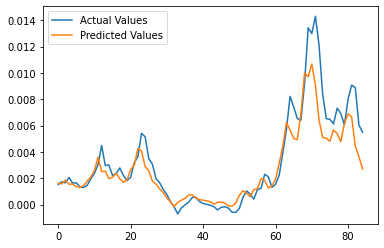

In [698]:
print(lr.coef_, lr.intercept_)

plt.plot(y_test, label="Actual Values")
plt.plot(y_pred, label="Predicted Values")
plt.legend()
plt.show()


In [699]:
import statsmodels.api as sm

log_clf =sm.OLS(y_test,X_test)

classifier = log_clf.fit()

print(classifier.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.947     
Dependent Variable:     y                AIC:                         -915.7099 
Date:                   2022-08-05 22:11 BIC:                         -910.8246 
No. Observations:       85               Log-Likelihood:              459.85    
Df Model:               2                F-statistic:                 753.7     
Df Residuals:           83               Prob (F-statistic):          6.01e-54  
R-squared (uncentered): 0.948            Scale:                       1.1988e-06
--------------------------------------------------------------------------------------
            Coef.        Std.Err.          t          P>|t|        [0.025       0.975]
--------------------------------------------------------------------------------------
x1          0.1913         0.0664        2.8810       0.0050       0.0592       0.3234
x2          0.9017         0.